In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#from scipy.stats import shapiro, kstest, poisson, chisquare, ttest_ind, levene, bartlett, sem, ppf
import scipy.stats as stats

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.options.display.float_format = '{:.1f}'.format # para poner los números con un decimal

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("marketing_AB.csv", index_col = 0)
df.head(2)

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22


## Ejercicio 1

In [3]:
# una vez que tengamos nuestro DataFrame preparado con todas las columnas que queremos vamos a crear una función que no haga una exploración inicial del conjunto de datos
def exploracion_dataframe(dataframe, columna_control):
    
    print(f"Los duplicados que tenemos en el conjunto de datos son: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    
    
    # generamos un DataFrame para los valores nulos
    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    print("\n ..................... \n")
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))
    
    
    print("\n ..................... \n")
    print("Los valores que tenemos para las columnas categóricas son: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valore únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()).head())    
    
    # como estamos en un problema de A/B testing y lo que realmente nos importa es comparar entre el grupo de control y el de test, los principales estadísticos los vamos a sacar de cada una de las categorías
    
    for categoria in dataframe[columna_control].unique():
        
        dataframe_filtrado = dataframe[dataframe[columna_control] == categoria]
    
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas categóricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe(include = "O").T)
        
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas numéricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe().T)

In [4]:
exploracion_dataframe(df, "test group")

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
user id,int64
test group,object
converted,bool
total ads,int64
most ads day,object
most ads hour,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna TEST GROUP tiene las siguientes valore únicos:


,test group
ad,564577
psa,23524


La columna MOST ADS DAY tiene las siguientes valore únicos:


,most ads day
Friday,92608
Monday,87073
Sunday,85391
Thursday,82982
Saturday,81660



 ..................... 

Los principales estadísticos de las columnas categóricas para el AD son: 


,count,unique,top,freq
test group,564577,1,ad,564577
most ads day,564577,7,Friday,88805



 ..................... 

Los principales estadísticos de las columnas numéricas para el AD son: 


,count,mean,std,min,25%,50%,75%,max
user id,564577.0,1327314.3,188918.1,1000000.0,1163686.0,1327362.0,1490914.0,1654483.0
total ads,564577.0,24.8,43.8,1.0,4.0,13.0,27.0,2065.0
most ads hour,564577.0,14.5,4.8,0.0,11.0,14.0,18.0,23.0



 ..................... 

Los principales estadísticos de las columnas categóricas para el PSA son: 


,count,unique,top,freq
test group,23524,1,psa,23524
most ads day,23524,7,Thursday,3905



 ..................... 

Los principales estadísticos de las columnas numéricas para el PSA son: 


,count,mean,std,min,25%,50%,75%,max
user id,23524.0,911761.5,6790.9,900000.0,905880.8,911761.5,917642.2,923523.0
total ads,23524.0,24.8,42.9,1.0,4.0,12.0,26.0,907.0
most ads hour,23524.0,14.3,4.7,0.0,11.0,14.0,18.0,23.0


In [31]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


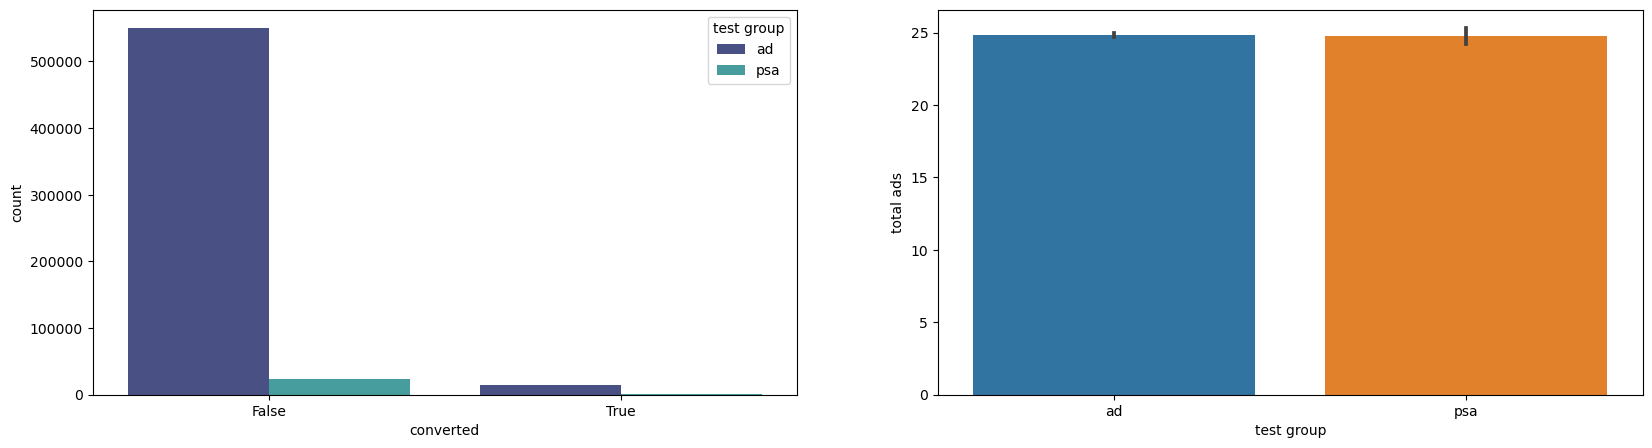

In [5]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.countplot(hue = "test group", x = "converted", data = df, ax = axes[0], palette = "mako")
sns.barplot(x = "test group", y = "total ads", data = df, ax = axes[1]);

In [6]:
# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

    

In [7]:
# Separar los datos en dos grupos: "ad" y "psa"
group_ad = df[df['test group'] == 'ad']
group_psa = df[df['test group'] == 'psa']

# Calcular las tasas de conversión para cada grupo
conversion_rate_ad = group_ad['converted'].mean()
conversion_rate_psa = group_psa['converted'].mean()

# Realizar la prueba de hipótesis (prueba t de Student)
t_stat, p_value = stats.ttest_ind(group_ad['converted'], group_psa['converted'])

# Definir un nivel de significancia (alfa)
alfa = 0.05

# Imprimir los resultados
print(f"Tasa de conversión en el grupo 'ad': {conversion_rate_ad:.2f}")
print(f"Tasa de conversión en el grupo 'psa': {conversion_rate_psa:.2f}")
print(f"Valor p de la prueba de hipótesis: {p_value:.4f}")

# Comparar el valor p con alfa para tomar una decisión
if p_value < alfa:
    print("Se rechaza la hipótesis nula: Hay una diferencia significativa en las tasas de conversión.")
else:
    print("No se rechaza la hipótesis nula: No hay evidencia suficiente para afirmar una diferencia significativa.")


Tasa de conversión en el grupo 'ad': 0.03
Tasa de conversión en el grupo 'psa': 0.02
Valor p de la prueba de hipótesis: 0.0000
Se rechaza la hipótesis nula: Hay una diferencia significativa en las tasas de conversión.


# Ejercicio 2

In [8]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


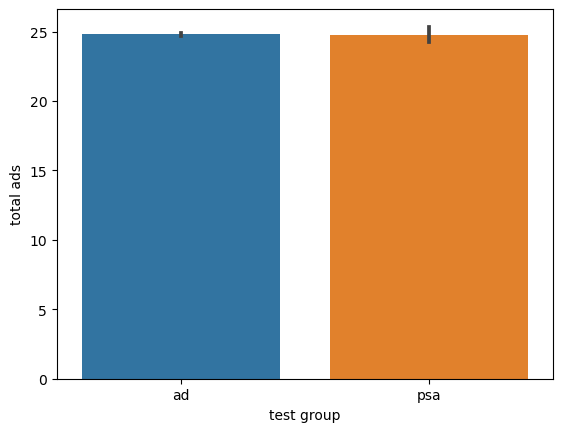

In [9]:

sns.barplot(x = "test group", y = "total ads", data = df);


In [10]:
# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

    
normalidad(df, "total ads")

Para la columna total ads los datos no siguen una distribución normal.


In [11]:
# vamos a crear una función para calcular este test y ver si hay diferencias entre los grupos de estudio

def test_man_whitney(dataframe, columnas_metricas, grupo_control, grupo_test, columna_grupos = "campaign_name"):

    
    # filtramos el DataFrame para quedarnos solo con los datos de control
    control = dataframe[dataframe[columna_grupos] == grupo_control]
    
    # filtramos el DataFrame para quedarnos solo con los datos de control
    test = dataframe[dataframe[columna_grupos] == grupo_test]
    
    
    # iteramos por las columnas de las metricas para ver si para cada una de ellas hay diferencias entre los grupos
    for metrica in columnas_metricas:
        
        # filtrams el conjunto de datos para quedarnos solo con la columna de la metrica que nos interesa
        metrica_control = control[metrica]
        metrica_test = test[metrica]
        
        # aplicamos el estadístico
        u_statistic, p_value = stats.mannwhitneyu(metrica_control, metrica_test)
        
        if p_value < 0.05:
            print(f"Para la métrica {metrica}, las medianas son diferentes.")
        else:
            print(f"Para la métrica {metrica}, las medianas son iguales.")
            
    

## llamamos a la función
test_man_whitney(df, ["total ads"], "ad", "psa", columna_grupos="test group" )

Para la métrica total ads, las medianas son diferentes.


## Ejercicio 2

- **Hipótesis nula (H0)**: No hay diferencia significativa en la cantidad promedio de anuncios vistos por usuario entre los grupos "ad" y "psa".
- **Hipótesis alternativa (H1)**: Existe una diferencia significativa en la cantidad promedio de anuncios vistos por usuario entre los grupos "ad" y "psa".
